In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
models_embedding = ['text-embedding-3-large', 'text-embedding-3-small']
models_llm = ['gpt-3.5-turbo', 'gpt-4o']

In [3]:
k_list = [1,3,7,10]

# success

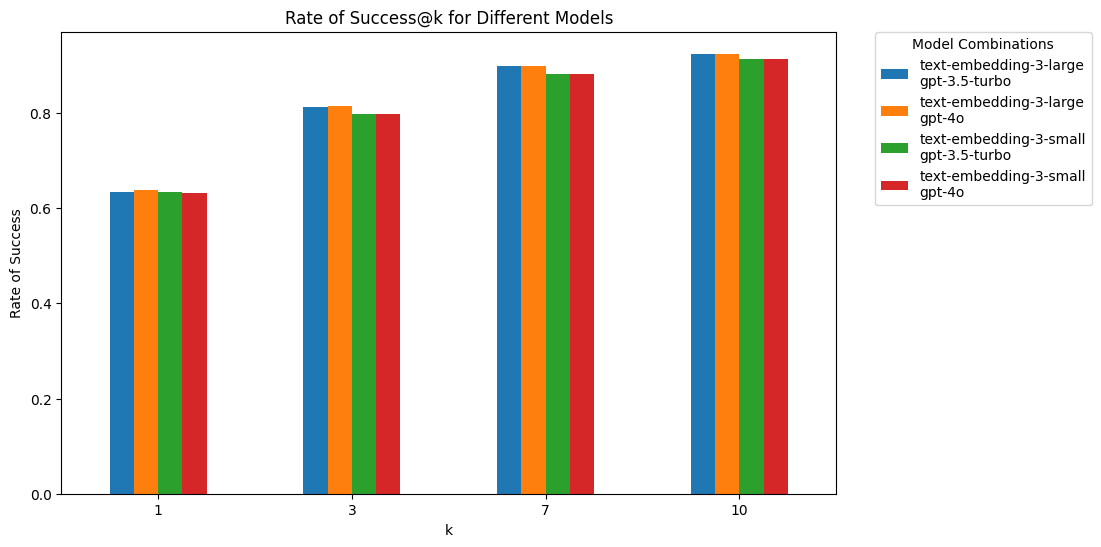

In [4]:
# DataFrame para consolidar los resultados
consolidated_df = pd.DataFrame()

for model_embedding in models_embedding:
    for model_llm in models_llm:
        verdes_df = pd.read_csv(f'métricas_verdes/métricas_verdes_{model_embedding}_{model_llm}.csv')
        verdes_df = verdes_df[[f'Success@{k}' for k in k_list]]
        
        # Sumar los valores de las columnas 'success@k'
        sum_success = verdes_df.sum()/len(verdes_df)
        
        # Crear un DataFrame temporal con los resultados
        temp_df = pd.DataFrame({
            'k': [col.split('@')[1] for col in verdes_df.columns],
            f'{model_embedding}\n{model_llm}': sum_success.values
        })
        
        # Añadir los resultados al DataFrame consolidado
        if consolidated_df.empty:
            consolidated_df = temp_df
        else:
            consolidated_df = pd.merge(consolidated_df, temp_df, on='k')

# Convertir 'k' a valores numéricos para un mejor orden en el gráfico
consolidated_df['k'] = consolidated_df['k'].astype(int)
consolidated_df = consolidated_df.sort_values(by='k')

# Generar el gráfico de barras
consolidated_df.plot(x='k', kind='bar', figsize=(10, 6))
plt.title('Rate of Success@k for Different Models')
plt.xlabel('k')
plt.ylabel('Rate of Success')
plt.xticks(rotation=0)
plt.legend(title='Model Combinations', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig('Imágenes/Success.png', bbox_inches='tight')
plt.show()

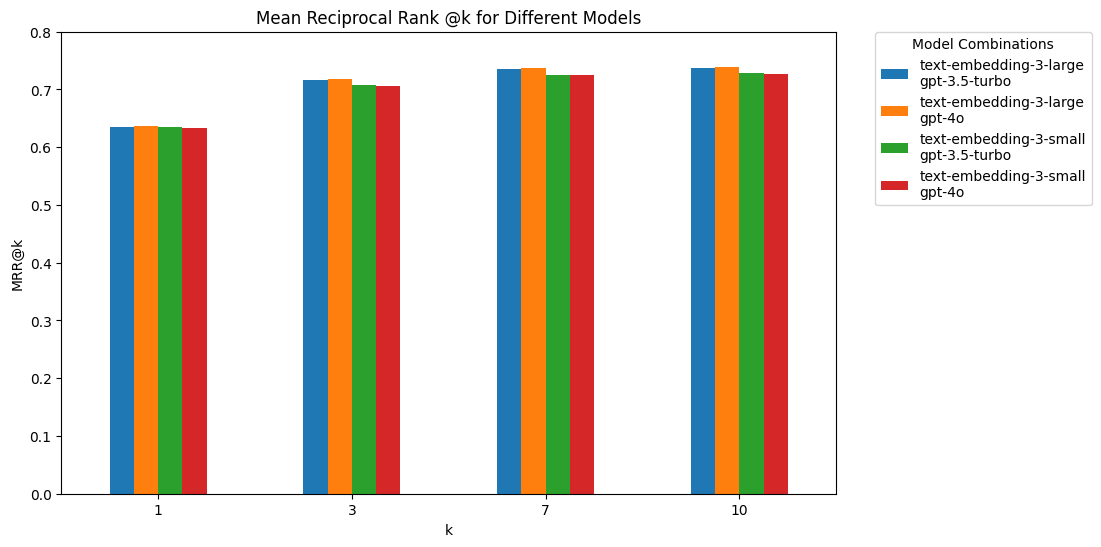

In [5]:
# DataFrame para consolidar los resultados
consolidated_df = pd.DataFrame()

for model_embedding in models_embedding:
    for model_llm in models_llm:
        verdes_df = pd.read_csv(f'métricas_verdes/métricas_verdes_{model_embedding}_{model_llm}.csv')
        verdes_df = verdes_df[[f'RR@{k}' for k in k_list]]
        
        # Sumar los valores de las columnas 'success@k'
        sum_success = verdes_df.sum()/len(verdes_df)
        
        # Crear un DataFrame temporal con los resultados
        temp_df = pd.DataFrame({
            'k': [col.split('@')[1] for col in verdes_df.columns],
            f'{model_embedding}\n{model_llm}': sum_success.values
        })
        
        # Añadir los resultados al DataFrame consolidado
        if consolidated_df.empty:
            consolidated_df = temp_df
        else:
            consolidated_df = pd.merge(consolidated_df, temp_df, on='k')

# Convertir 'k' a valores numéricos para un mejor orden en el gráfico
consolidated_df['k'] = consolidated_df['k'].astype(int)
consolidated_df = consolidated_df.sort_values(by='k')

# Generar el gráfico de barras
consolidated_df.plot(x='k', kind='bar', figsize=(10, 6))
plt.title('Mean Reciprocal Rank @k for Different Models')
plt.xlabel('k')
plt.ylabel('MRR@k')
plt.ylim([0,0.8])
plt.xticks(rotation=0)
plt.legend(title='Model Combinations', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig('Imágenes/MRR.png', bbox_inches='tight')
plt.show()

In [18]:
for model_embedding in models_embedding:
    for model_llm in models_llm:
        print(f'{model_embedding = }')
        print(f'{model_llm = }')
        print('---------------------------------------')
        print(llm_df[[columna for columna in llm_df.columns if columna.startswith(f'Precis') or columna == 'Success@3']])
        for k in k_list:
            llm_df = pd.read_csv(f'métricas_verdes/métricas_verdes_{model_embedding}_{model_llm}.csv')
            print(llm_df[[columna for columna in llm_df.columns if columna.endswith(f'{k}')]].mean())
            print()
        print('---------------------------------------')

model_embedding = 'text-embedding-3-large'
model_llm = 'gpt-3.5-turbo'
---------------------------------------
     Precision@1  Success@3  Precision@3  Precision@7  Precision@10
0            1.0          1     0.333333     0.142857           0.1
1            0.0          1     0.333333     0.142857           0.1
2            1.0          1     0.333333     0.142857           0.1
3            0.0          1     0.333333     0.142857           0.1
4            0.0          1     0.333333     0.142857           0.1
..           ...        ...          ...          ...           ...
591          1.0          1     0.333333     0.142857           0.1
592          0.0          0     0.000000     0.000000           0.0
593          0.0          0     0.000000     0.000000           0.0
594          1.0          1     0.333333     0.142857           0.1
595          1.0          1     0.333333     0.142857           0.1

[596 rows x 5 columns]
Success@1      0.634228
RR@1           0.634228
P

In [11]:
for model_embedding in models_embedding:
    for model_llm in models_llm:
        verdes_df = pd.read_csv(f'métricas_llm/métricas_llm_{model_embedding}_{model_llm}.csv')
        print(verdes_df[verdes_df.columns[-5:]].mean())
        print()

Recall@7        0.899329
Success@10      0.924497
RR@10           0.737595
Precision@10    0.092450
Recall@10       0.924497
dtype: float64

Recall@7        0.899329
Success@10      0.924497
RR@10           0.739509
Precision@10    0.092450
Recall@10       0.924497
dtype: float64

Recall@7        0.882550
Success@10      0.912752
RR@10           0.728419
Precision@10    0.091275
Recall@10       0.912752
dtype: float64

Recall@7        0.882550
Success@10      0.912752
RR@10           0.727580
Precision@10    0.091275
Recall@10       0.912752
dtype: float64

